In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import numpy as np
plt.rc('font', family='NanumGothic')

In [2]:
# 데이터 불러오기
df = pd.read_excel('bike.xlsx', names=['num','instant(순서)', 'dteday(날짜)', 'season(계절)', 
                   'yr(연)', 'mnth(월)','hr(시)', 'holiday(공휴일)', 'weekday(요일)', 'workingday(휴일X)', 'weathersit(날씨)',
                    'temp(기온)', 'atemp(체감온도)', 'hum(습도)', 'windspeed(풍속)', 'cnt(총 개수)'])

df.head()

,num,instant(순서),dteday(날짜),season(계절),yr(연),mnth(월),hr(시),holiday(공휴일),weekday(요일),workingday(휴일X),weathersit(날씨),temp(기온),atemp(체감온도),hum(습도),windspeed(풍속),cnt(총 개수)
0,0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [3]:
df['day(일)'] = df['dteday(날짜)'].str.split('/').str[1]
df = df.astype({'day(일)': 'int'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num              17379 non-null  int64  
 1   instant(순서)      17379 non-null  int64  
 2   dteday(날짜)       17379 non-null  object 
 3   season(계절)       17379 non-null  int64  
 4   yr(연)            17379 non-null  int64  
 5   mnth(월)          17379 non-null  int64  
 6   hr(시)            17379 non-null  int64  
 7   holiday(공휴일)     17379 non-null  int64  
 8   weekday(요일)      17379 non-null  int64  
 9   workingday(휴일X)  17379 non-null  int64  
 10  weathersit(날씨)   17379 non-null  int64  
 11  temp(기온)         17379 non-null  float64
 12  atemp(체감온도)      17379 non-null  float64
 13  hum(습도)          17379 non-null  float64
 14  windspeed(풍속)    17379 non-null  float64
 15  cnt(총 개수)        17379 non-null  int64  
 16  day(일)           17379 non-null  int32  
dtypes: float64(4

In [5]:
df = df.astype({'season(계절)': 'str'})
df = df.astype({'holiday(공휴일)': 'str'})
df = df.astype({'weekday(요일)': 'str'})
df = df.astype({'workingday(휴일X)': 'str'})
df = df.astype({'weathersit(날씨)': 'str'})

In [6]:
#'dteday(날짜)'와 'hr(시)' 통합
df['date(시간)'] = pd.to_datetime(df['dteday(날짜)'].astype(str) + ' ' + df['hr(시)'].astype(str) + ":00:00")

#데이터 컬럼 순서 변경
df = df[['date(시간)', 'yr(연)', 'mnth(월)', 'day(일)', 'hr(시)',
         'season(계절)', 'weekday(요일)', 'workingday(휴일X)', 'weathersit(날씨)',
            'atemp(체감온도)', 'hum(습도)', 'windspeed(풍속)', 'cnt(총 개수)']]

df.head()

,date(시간),yr(연),mnth(월),day(일),hr(시),season(계절),weekday(요일),workingday(휴일X),weathersit(날씨),atemp(체감온도),hum(습도),windspeed(풍속),cnt(총 개수)
0,2011-01-01 00:00:00,0,1,1,0,1,6,0,1,0.2879,0.81,0.0,16
1,2011-01-01 01:00:00,0,1,1,1,1,6,0,1,0.2727,0.80,0.0,40
2,2011-01-01 02:00:00,0,1,1,2,1,6,0,1,0.2727,0.80,0.0,32
3,2011-01-01 03:00:00,0,1,1,3,1,6,0,1,0.2879,0.75,0.0,13
4,2011-01-01 04:00:00,0,1,1,4,1,6,0,1,0.2879,0.75,0.0,1


- 공휴일과 workingday 데이터는 크게 차이가 없어 제거
- 온도보다는 체감온도가 사용률에 영향을 주기 때문에 제거

In [7]:
df.isnull().sum()

date(시간)           0
yr(연)              0
mnth(월)            0
day(일)             0
hr(시)              0
season(계절)         0
weekday(요일)        0
workingday(휴일X)    0
weathersit(날씨)     0
atemp(체감온도)        0
hum(습도)            0
windspeed(풍속)      0
cnt(총 개수)          0
dtype: int64

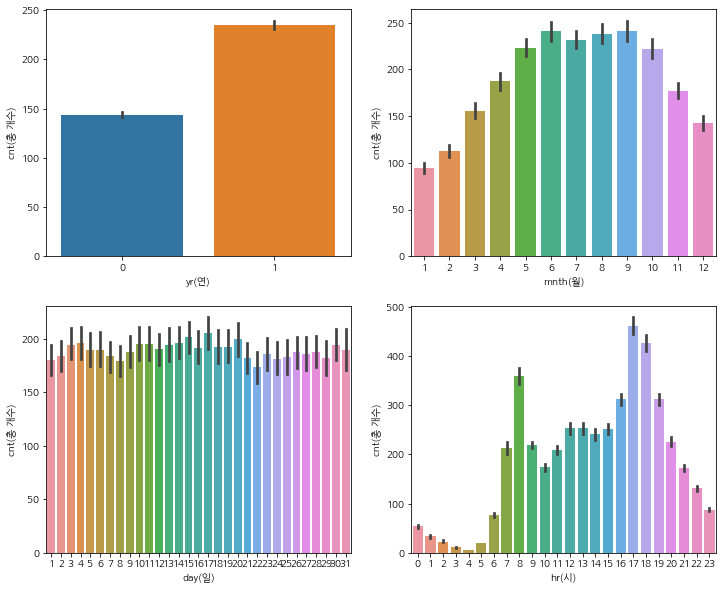

In [8]:
fig1 = plt.figure(figsize=[12,10])

s1 = fig1.add_subplot(2,2,1)
s1 = sns.barplot(x=df['yr(연)'],y=df['cnt(총 개수)'])

s1 = fig1.add_subplot(2,2,2)
s1 = sns.barplot(x=df['mnth(월)'],y=df['cnt(총 개수)'])

s1 = fig1.add_subplot(2,2,3)
s1 = sns.barplot(x=df['day(일)'],y=df['cnt(총 개수)'])

s1 = fig1.add_subplot(2,2,4)
s1 = sns.barplot(x=df['hr(시)'],y=df['cnt(총 개수)'])

#### **시간에 따른 결과**
- 연도별 데이터의 경우 전체적인 이용률의 증가라고 볼 수 있어 향후 추가 데이터가 있어야 활용 가능
- 월별 데이터의 경우 5~10월의 이용률이 높아 유의미하게 활용 가능
- 일별 데이터의 경우 큰 차이가 없어 유의미하게 활용 불가능
- 시간별 데이터의 경우 시간대에 따라 큰 차이를 보이고 있어 유의미하게 활용 가능

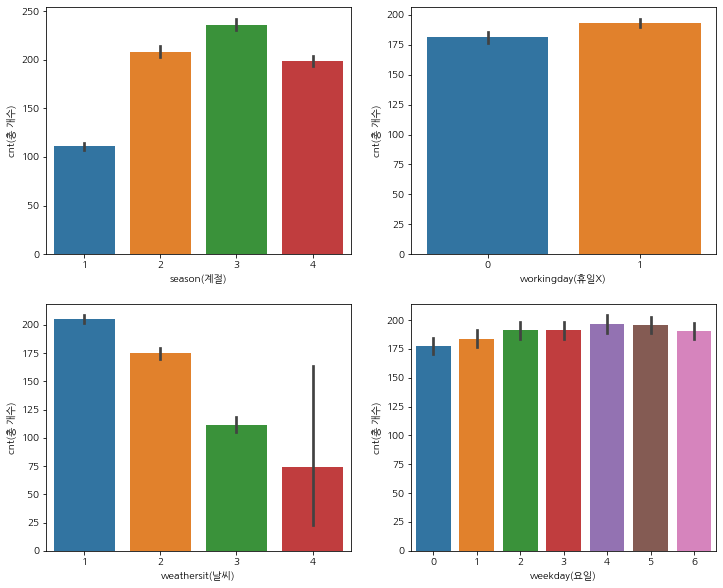

In [9]:
fig = plt.figure(figsize=[12,10])

s1 = fig.add_subplot(2,2,1)
s1 = sns.barplot(x=df['season(계절)'],y=df['cnt(총 개수)'])

s1 = fig.add_subplot(2,2,2)
s1 = sns.barplot(x=df['workingday(휴일X)'],y=df['cnt(총 개수)'])

s1 = fig.add_subplot(2,2,3)
s1 = sns.barplot(x=df['weathersit(날씨)'],y=df['cnt(총 개수)'])

s1 = fig.add_subplot(2,2,4)
s1 = sns.barplot(x=df['weekday(요일)'],y=df['cnt(총 개수)'])

#### **날씨와 요일에 따른 결과**
- 계절별 데이터의 경우 겨울보다 여름이 압도적으로 높아 유의미하게 활용 가능
- 휴일별 데이터의 경우 기대치보다 큰 차이가 없어 유의미하게 활용 불가능
- 날씨별 데이터의 경우 맑은 날이 비 혹은 눈이 오는 날에 비해 압도적으로 높아 유의미하게 활용 가능
- 요일별 데이터의 경우 기대치보다 큰 차이가 없어 유의미하게 활용 불가능

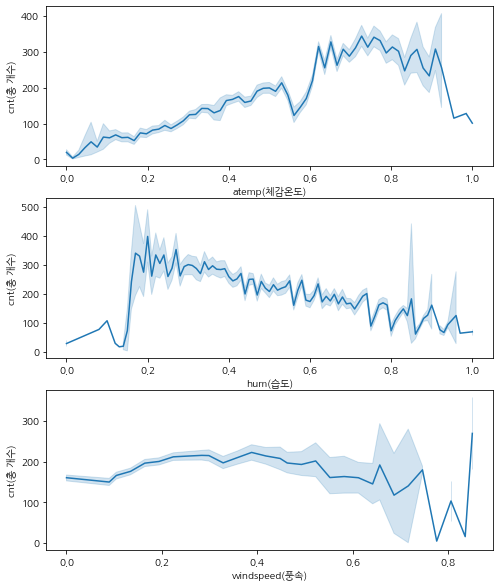

In [10]:
fig = plt.figure(figsize=[8,10])

s1 = fig.add_subplot(3,1,1)
s1 = sns.lineplot(x=df['atemp(체감온도)'],y=df['cnt(총 개수)'])

s1 = fig.add_subplot(3,1,2)
s1 = sns.lineplot(x=df['hum(습도)'],y=df['cnt(총 개수)'])

s1 = fig.add_subplot(3,1,3)
s1 = sns.lineplot(x=df['windspeed(풍속)'],y=df['cnt(총 개수)'])

#### **기타 데이터에 따른 결과**
- 체감온도별 데이터의 경우 특정 온도 이상에 사용자가 증가하므로 유의미하게 활용 가능
- 습도별 데이터의 경우 습도가 높아질수록 사용자가 감소하므로 유의미하게 활용 가능
- 풍속별 데이터의 경우 이상치를 제외하고 크게 차이가 나지 않으므로 유의하게 활용 불가능

## **체감온도를 기반으로 한 단일회귀분석**

In [20]:
X = df[['atemp(체감온도)']] 
Y = df['cnt(총 개수)']
print(X, '\n\n')
print(Y)

       atemp(체감온도)
0           0.2879
1           0.2727
2           0.2727
3           0.2879
4           0.2879
...            ...
17374       0.2576
17375       0.2576
17376       0.2576
17377       0.2727
17378       0.2727

[17379 rows x 1 columns] 


0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt(총 개수), Length: 17379, dtype: int64


In [21]:
## dataset을 training data와 test data로 분할
# train_test_split(독립변수, 종속변수. test data 사이즈(%), 랜덤 추출 시드값(같은 시드 값에서는 같은 랜덤값이 나옴))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print('train data 개수 :', len(X_train))
print('test data 개수 :', len(X_test), '\n')

train data 개수 : 12165
test data 개수 : 5214 



In [22]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 회귀모델 학습
lr.fit(X_train, Y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R^2) 계산
r_square = lr.score(X_train, Y_train)

# 회귀식과 결정계수(R^2) 산출
print('회귀식 :', float(lr.coef_), 'X +', lr.intercept_)
print('결정계수(R^2) :', r_square)

회귀식 : 425.3509370330758 X + -12.173354015597369
결정계수(R^2) : 0.16070524926325325


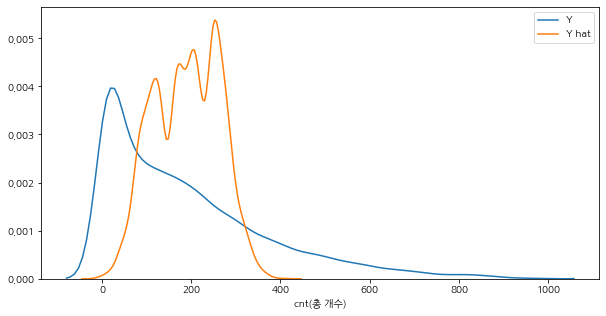

In [23]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제값 y와 비교
Y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(Y_hat, hist = False, label = 'Y hat', ax = ax1)

plt.show()
plt.close()

## **습도를 기반으로 한 단일회귀분석**

In [24]:
X = df[['hum(습도)']] 
Y = df['cnt(총 개수)']
print(X, '\n\n')
print(Y)

       hum(습도)
0         0.81
1         0.80
2         0.80
3         0.75
4         0.75
...        ...
17374     0.60
17375     0.60
17376     0.60
17377     0.56
17378     0.65

[17379 rows x 1 columns] 


0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt(총 개수), Length: 17379, dtype: int64


In [25]:
## dataset을 training data와 test data로 분할
# train_test_split(독립변수, 종속변수. test data 사이즈(%), 랜덤 추출 시드값(같은 시드 값에서는 같은 랜덤값이 나옴))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print('train data 개수 :', len(X_train))
print('test data 개수 :', len(X_test), '\n')

train data 개수 : 12165
test data 개수 : 5214 



In [26]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 회귀모델 학습
lr.fit(X_train, Y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R^2) 계산
r_square = lr.score(X_train, Y_train)

# 회귀식과 결정계수(R^2) 산출
print('회귀식 :', float(lr.coef_), 'X +', lr.intercept_)
print('결정계수(R^2) :', r_square)

회귀식 : -304.42072357441566 X + 381.48606148391434
결정계수(R^2) : 0.1035514555220286


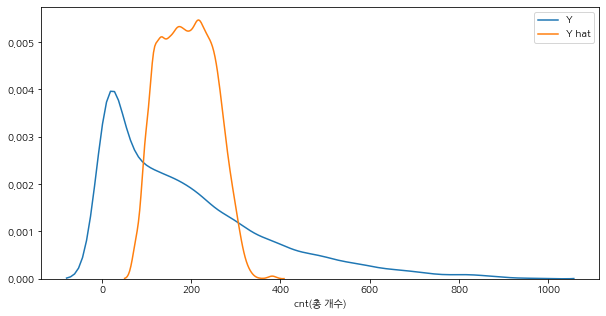

In [27]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제값 y와 비교
Y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(Y_hat, hist = False, label = 'Y hat', ax = ax1)

plt.show()
plt.close()

## **풍속을 기반으로 한 단일회귀분석**

In [32]:
X = df[['windspeed(풍속)']] 
Y = df['cnt(총 개수)']
print(X, '\n\n')
print(Y)

       windspeed(풍속)
0             0.0000
1             0.0000
2             0.0000
3             0.0000
4             0.0000
...              ...
17374         0.1642
17375         0.1642
17376         0.1642
17377         0.1343
17378         0.1343

[17379 rows x 1 columns] 


0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt(총 개수), Length: 17379, dtype: int64


In [33]:
## dataset을 training data와 test data로 분할
# train_test_split(독립변수, 종속변수. test data 사이즈(%), 랜덤 추출 시드값(같은 시드 값에서는 같은 랜덤값이 나옴))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print('train data 개수 :', len(X_train))
print('test data 개수 :', len(X_test), '\n')

train data 개수 : 12165
test data 개수 : 5214 



In [34]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 회귀모델 학습
lr.fit(X_train, Y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R^2) 계산
r_square = lr.score(X_train, Y_train)

# 회귀식과 결정계수(R^2) 산출
print('회귀식 :', float(lr.coef_), 'X +', lr.intercept_)
print('결정계수(R^2) :', r_square)

회귀식 : 132.707834436333 X + 165.20264623838202
결정계수(R^2) : 0.007971580528575273


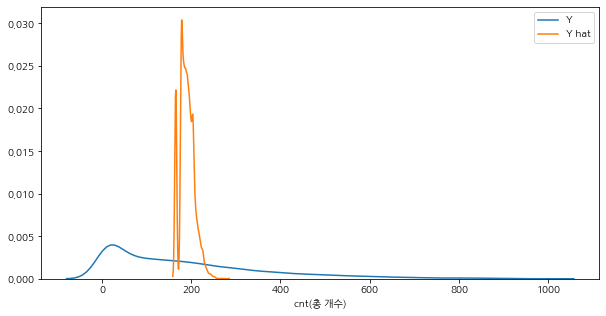

In [35]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제값 y와 비교
Y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(Y_hat, hist = False, label = 'Y hat', ax = ax1)

plt.show()
plt.close()

## **체감온도와 습도를 기반으로 한 다중선형회귀분석**

In [15]:
X = df[['atemp(체감온도)', 'hum(습도)']] 
Y = df['cnt(총 개수)']
print(X, '\n\n')
print(Y)

       atemp(체감온도)  hum(습도)
0           0.2879     0.81
1           0.2727     0.80
2           0.2727     0.80
3           0.2879     0.75
4           0.2879     0.75
...            ...      ...
17374       0.2576     0.60
17375       0.2576     0.60
17376       0.2576     0.60
17377       0.2727     0.56
17378       0.2727     0.65

[17379 rows x 2 columns] 


0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt(총 개수), Length: 17379, dtype: int64


In [16]:
## dataset을 training data와 test data로 분할
# train_test_split(독립변수, 종속변수. test data 사이즈(%), 랜덤 추출 시드값(같은 시드 값에서는 같은 랜덤값이 나옴))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print('train data 개수 :', len(X_train))
print('test data 개수 :', len(X_test), '\n')

train data 개수 : 12165
test data 개수 : 5214 



In [17]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 회귀모델 학습
lr.fit(X_train, Y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R^2) 계산
r_square = lr.score(X_train, Y_train)

# 회귀식과 결정계수(R^2) 산출
print('회귀식 :', lr.coef_, 'Xn +', lr.intercept_)
print('결정계수(R^2) :', r_square)

회귀식 : [ 408.41555288 -285.13793595] Xn + 174.72309665494845
결정계수(R^2) : 0.2512989972822759


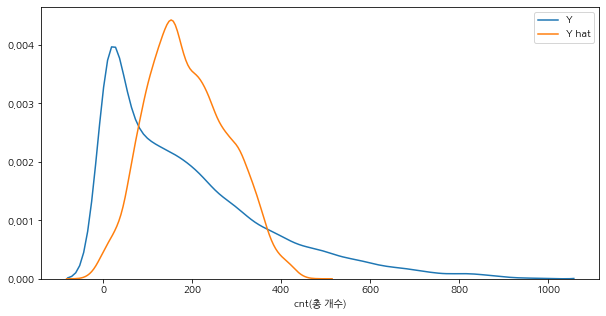

In [18]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제값 y와 비교
Y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(Y_hat, hist = False, label = 'Y hat', ax = ax1)

plt.show()
plt.close()

## **체감온도와 습도, 풍속을 기반으로 한 다중선형회귀분석**

In [36]:
X = df[['atemp(체감온도)', 'hum(습도)', 'windspeed(풍속)']] 
Y = df['cnt(총 개수)']
print(X, '\n\n')
print(Y)

       atemp(체감온도)  hum(습도)  windspeed(풍속)
0           0.2879     0.81         0.0000
1           0.2727     0.80         0.0000
2           0.2727     0.80         0.0000
3           0.2879     0.75         0.0000
4           0.2879     0.75         0.0000
...            ...      ...            ...
17374       0.2576     0.60         0.1642
17375       0.2576     0.60         0.1642
17376       0.2576     0.60         0.1642
17377       0.2727     0.56         0.1343
17378       0.2727     0.65         0.1343

[17379 rows x 3 columns] 


0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt(총 개수), Length: 17379, dtype: int64


In [37]:
## dataset을 training data와 test data로 분할
# train_test_split(독립변수, 종속변수. test data 사이즈(%), 랜덤 추출 시드값(같은 시드 값에서는 같은 랜덤값이 나옴))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print('train data 개수 :', len(X_train))
print('test data 개수 :', len(X_test), '\n')

train data 개수 : 12165
test data 개수 : 5214 



In [38]:
# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 회귀모델 학습
lr.fit(X_train, Y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R^2) 계산
r_square = lr.score(X_train, Y_train)

# 회귀식과 결정계수(R^2) 산출
print('회귀식 :', lr.coef_, 'Xn +', lr.intercept_)
print('결정계수(R^2) :', r_square)

회귀식 : [ 411.42440179 -276.06918408   48.64597006] Xn + 158.30321652056284
결정계수(R^2) : 0.25227307463306703


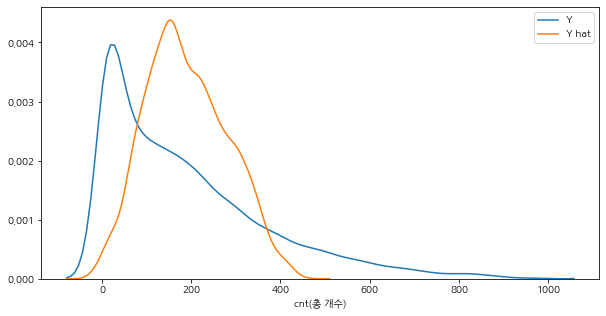

In [39]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제값 y와 비교
Y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = 'Y')
ax2 = sns.distplot(Y_hat, hist = False, label = 'Y hat', ax = ax1)

plt.show()
plt.close()

### **결론 : 체감온도와 습도를 활용한 회귀분석의 표준편차가 가장 낮음**
#### 추가 : 로지스틱 회귀분석이라는 이산형 데이터 회귀분석을 활용하면 더 좋은 학습을 시킬 수 있지 않을까?